In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [42]:
imPth = r'cat.jpg'
img = plt.imread(imPth)

In [44]:
def f_getGaussianFilter(s,sigma): # receives window size and sigma, assume window is square
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    G = np.zeros((s,s)) # Gaussian matrix
    for x in range(minX,maxX+1): # for each x value, plus 1 to include max x
        for y in range(minY,maxY+1): # for each y value
            v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            G[x-minX,y-minY] = v
    return G

In [46]:
G = f_getGaussianFilter(3,0.5)

In [48]:
G

array([[0.0116601 , 0.08615712, 0.0116601 ],
       [0.08615712, 0.63661977, 0.08615712],
       [0.0116601 , 0.08615712, 0.0116601 ]])

In [50]:
np.sum(G) # should be 1

1.0278886326376104

In [52]:
cv2.getGaussianKernel?  # shows how function works

SyntaxError: invalid syntax (3309821884.py, line 1)

# how to get gaussian kernel using openCV

In [55]:
a = cv2.getGaussianKernel(5,1)
G2 = a.dot(a.T)
G2

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

In [57]:
np.sum(G2) # sum is now exactly 1

1.0

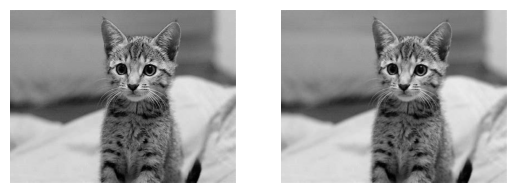

Docstring:
getGaussianKernel(ksize, sigma[, ktype]) -> retval
.   @brief Returns Gaussian filter coefficients.
.   
.   The function computes and returns the \f$\texttt{ksize} \times 1\f$ matrix of Gaussian filter
.   coefficients:
.   
.   \f[G_i= \alpha *e^{-(i-( \texttt{ksize} -1)/2)^2/(2* \texttt{sigma}^2)},\f]
.   
.   where \f$i=0..\texttt{ksize}-1\f$ and \f$\alpha\f$ is the scale factor chosen so that \f$\sum_i G_i=1\f$.
.   
.   Two of such generated kernels can be passed to sepFilter2D. Those functions automatically recognize
.   smoothing kernels (a symmetrical kernel with sum of weights equal to 1) and handle them accordingly.
.   You may also use the higher-level GaussianBlur.
.   @param ksize Aperture size. It should be odd ( \f$\texttt{ksize} \mod 2 = 1\f$ ) and positive.
.   @param sigma Gaussian standard deviation. If it is non-positive, it is computed from ksize as
.   `sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8`.
.   @param ktype Type of filter coefficients. It can be CV_3

In [59]:
cv2.getGaussianKernel?
G = f_getGaussianFilter(3,0.5)
img_S = cv2.filter2D(img,-1,G)
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_S,cmap='gray')
plt.axis('off')
plt.show()

# Gaussian filter Smoothing

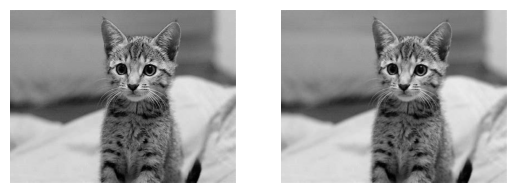

In [62]:
img_S = cv2.filter2D(img,-1,G)
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_S,cmap='gray')
plt.axis('off')
plt.show()

# Quiz: What does cv2.filter2D do?

#### -1 is used to preserve the image. The function slides a filter G over the image with its centre hitting every pixel and then calculating the dot product between the centre of the filter and every neighboroughing pixel in the image

# Image Gradient Implementation

In [67]:
img_S = img_S[:,:,0] # ensuring image is greyscale
mask_x = np.zeros((2,1)) # creating a 2 x 1 matrix
mask_x[0] = -1 # first row is -1
mask_x[1] = 1 # second row is 1

In [69]:
img_S = np.float64(img_S) # need dtype to be a float and not unint8 as that cant take negative values for the gradient vector
Ix = cv2.filter2D(img_S,-1,mask_x)
mask_y = mask_x.T # transpose of mask x
Iy = cv2.filter2D(img_S,-1,mask_y)

In [71]:
Ix.shape

(316, 411)

In [83]:
Ix.dtype

dtype('float64')

In [73]:
Iy.shape

(316, 411)

In [75]:
img_S.shape

(316, 411)

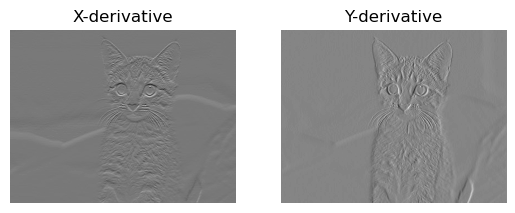

In [77]:
plt.subplot(121)
plt.imshow(Ix,cmap='gray')
plt.title('X-derivative')
plt.axis('off')
plt.subplot(122)
plt.imshow(Iy,cmap='gray')
plt.title('Y-derivative')
plt.axis('off')
plt.show()

In [79]:
gv = np.array([Ix[5,3],Iy[5,3]]) # giving gradient vector at (5,3)
gv

array([-2., -1.])

# Derifative of Gaussian Filter (DOG)

In [100]:
def Gx(s,sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    Gx = np.zeros((s,s))
    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (-x/(2*np.pi*(sigma**4)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            Gx[x-minX,y-minY] = v
    return Gx

In [102]:
def Gy(s,sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    Gy = np.zeros((s,s))
    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (-y/(2*np.pi*(sigma**4)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            Gy[x-minX,y-minY] = v
    return Gy

In [104]:
gx = Gx(3,0.5) # x mask
gy = Gy(3,0.5)

In [106]:
gx

array([[ 0.04664039,  0.34462847,  0.04664039],
       [ 0.        ,  0.        ,  0.        ],
       [-0.04664039, -0.34462847, -0.04664039]])

In [108]:
gy # transpose of gx

array([[ 0.04664039,  0.        , -0.04664039],
       [ 0.34462847,  0.        , -0.34462847],
       [ 0.04664039,  0.        , -0.04664039]])

In [110]:
img.shape # have 3 channels

(316, 411, 3)

In [112]:
img = np.float64(img[:,:,0]) # ensuring image is greyscale and a float

In [116]:
img.shape

(316, 411)

In [118]:
Ix = cv2.filter2D(img,-1,gx) # smoothed image
Iy = cv2.filter2D(img,-1,gy)

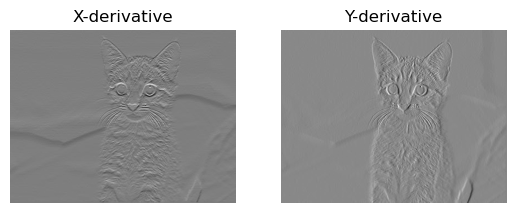

In [120]:
plt.subplot(121)
plt.imshow(Ix,cmap='gray')
plt.title('X-derivative')
plt.axis('off')
plt.subplot(122)
plt.imshow(Iy,cmap='gray')
plt.title('Y-derivative')
plt.axis('off')
plt.show()

# Gradient magnitude and direction

In [123]:
Gm = (Ix**2 + Iy**2)**0.5 # magnitude
Gd = np.rad2deg(np.arctan2(Iy,Ix)) # direction

In [125]:
Gd.min(),Gd.max() # min ad max direction

(-180.0, 180.0)

In [127]:
Gd.shape

(316, 411)

In [129]:
Gm.min(), Gm.max() # min and max shape

(0.0, 106.98721600947376)

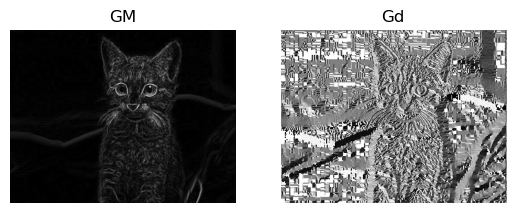

In [131]:
plt.subplot(121)
plt.imshow(Gm,cmap='gray')
plt.title('GM')
plt.axis('off')
plt.subplot(122)
plt.imshow(Gd,cmap='gray')
plt.title('Gd')
plt.axis('off')
plt.show()

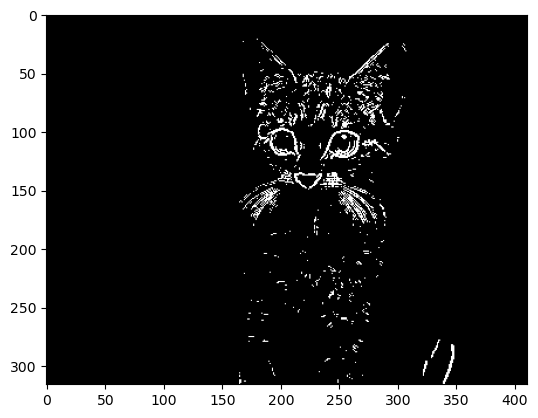

In [139]:
plt.imshow(Gm>30,cmap='gray') # notice that edges are quite thick, we want to suppress this...

# Non-maxima Supression

(array([11237., 10283., 12083., 10486., 11540., 24536., 10799., 10208.,
         8397., 20307.]),
 array([-180., -144., -108.,  -72.,  -36.,    0.,   36.,   72.,  108.,
         144.,  180.]),
 <BarContainer object of 10 artists>)

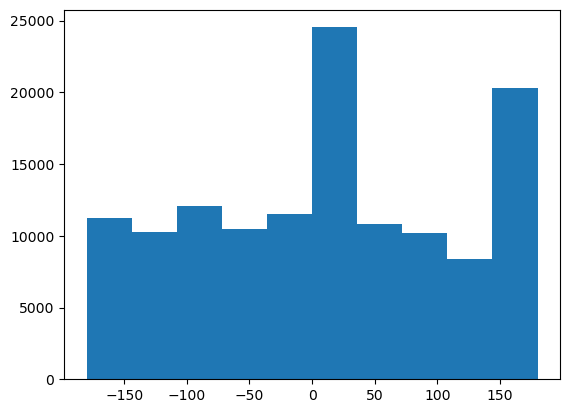

In [141]:
plt.hist(Gd.flatten()) # there are lots of gradient directions, need to quantise them

### Gradient Direction Quantisation

In [145]:
bins = np.array([-180.,-135.,-90.,-45.,0.,45.,90.,135.,180.]) # angles we want to retain
inds = np.digitize(Gd,bins)-1 # -1 to start indexing from 0
Gd_bin = bins[inds.flatten()].reshape(Gd.shape) # 

In [149]:
i,j = 50,250
Gd[i,j],Gd_bin[i,j] # showing how the function works

(141.36516362099675, 135.0)

In [155]:
A = np.array([180.,134.,179.,135,-33.,-180.])
inds = np.digitize(A,bins)-1

In [153]:
bins[inds] # mapping is slightly wrong

array([ 180.,   90.,  135.,  135.,  -45., -180.])

In [157]:
# rectifying this problem
A = np.array([180.,134.,179.,135,-33.,-180.,12,-12,-170])
A_bin = 45*(np.round(A/45))

In [159]:
A_bin # can see this is better, apart from -0?

array([ 180.,  135.,  180.,  135.,  -45., -180.,    0.,   -0., -180.])

#### Gradient direction quantisation actual method

In [161]:
Gd_bin = 45*(np.round(Gd/45)) # better way of doing the quantisation so ignore above code

In [167]:
i,j = 27,100
Gd[i,j],Gd_bin[i,j] # checking it works

(107.16036943868335, 90.0)

### Non-maxima supression implemetnation

In [171]:
def NMS(Gm,Gd): # takes gradient magnitude and directions
    Gd_bin = 45*(np.round(Gd/45)) # quantising direction
    Gm_NMS = np.zeros(Gm.shape) # output matrix
    numRows,numCols = Gm.shape[0],Gm.shape[1] # calculate the number of rows and columns in matrix
    a,b=0.,0. # computing neighbours
    for r in range(1,numRows-1): # excluding boundaries
        for c in range(1,numCols-1):
            ang = Gd_bin[r,c]
            if ang == 180. or ang == -180. or ang == 0.0 or ang == -0.0:
                a,b = Gm[r-1,c], Gm[r+1,c] # for 180,180 and 0 then pick neigbours above and below
            elif ang == 45. or ang == -135.:
                a,b = Gm[r+1,c+1],Gm[r-1,c-1] # top left and bottom right
            elif ang == 90. or ang == -90.:
                a,b = Gm[r,c-1],Gm[r,c+1] # left and right
            elif ang == 135. or ang == -45.:
                a,b = Gm[r-1,c+1],Gm[r+1,c-1] # top right and bottom left
            else:
                print('Error')
                return
            if Gm[r,c] >= a and Gm[r,c] >= b:
                Gm_NMS[r,c] = Gm[r,c] # not supressed
    return Gm_NMS

In [173]:
Gm_NMS = NMS(Gm,Gd)

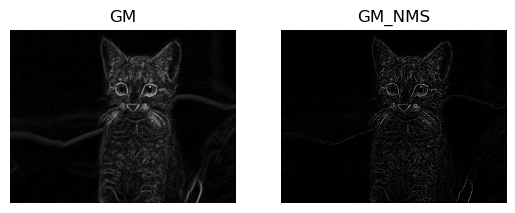

In [175]:
plt.subplot(121)
plt.imshow(Gm,cmap='gray')
plt.title('GM')
plt.axis('off')
plt.subplot(122)
plt.imshow(Gm_NMS,cmap='gray')
plt.title('GM_NMS')
plt.axis('off')
plt.show()

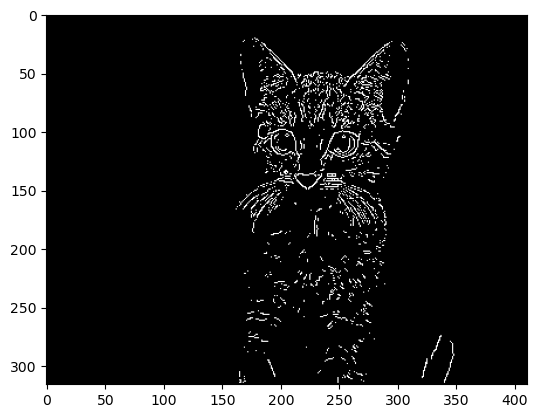

In [186]:
plt.imshow(Gm_NMS>25,cmap='gray')
# what is the best value for thresholding? it depends on the image and your goal

### Hesterysis Thresholding: Code is built in

#### prevents broken edges

In [190]:
from skimage import filters

In [191]:
L = Gm_NMS.mean() # lower threshold
H = L + Gm_NMS.std() # higher threshold
E = filters.apply_hysteresis_threshold(Gm_NMS,L,H)

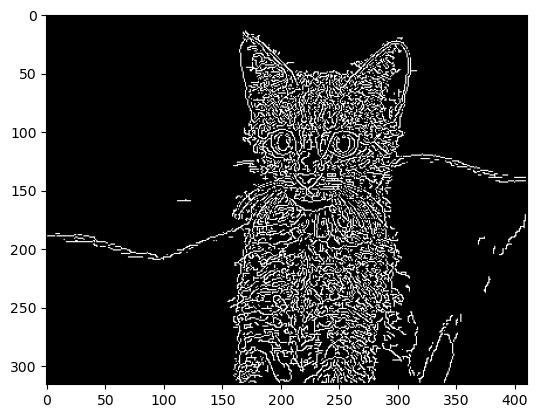

In [192]:
plt.imshow(E,cmap='gray')